In [34]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings("ignore")

In [35]:
nome_arquivo_csv = 'data/State_of_data_BR.csv'
dados = pd.read_csv(nome_arquivo_csv)

In [36]:
keys_questions_id = [
    name
    .split('\',')
    [0]
    .replace('(', '')
    .replace('\'', '')
    .replace(' ', '') 
    for name in dados.columns
]

values_questions_id = [
    name
    .split('\',')
    [1]
    .replace(')', '')
    .replace('\'', '') 
    [1:]
    for name in dados.columns
]

# Create dict
dict_questions_id = {
    key: value
    for key, value in zip(keys_questions_id, values_questions_id)
}


# DF auxiliar para avaliar e segmentar perguntas
questions_df = pd.DataFrame(dict_questions_id, index=['Pergunta']).T.reset_index().rename(columns={'index': 'col_id'})


# Tratando df auxiliar
questions_df = (
    questions_df.assign(
        Parte_id=lambda df_: df_['col_id'].str.replace('P', '').str.split('_', expand=True)[0],
        Pergunta_id=lambda df_: df_['col_id'].str.replace('P', '').str.split('_', expand=True)[1],
        Opcao_id=lambda df_: df_['col_id'].str.replace('P', '').str.split('_', expand=True)[2],
    )
    .merge(
        pd.DataFrame({
            'Parte_id': [str(x) for x in range(9)],
            'Parte': [
                'id',
                'Dados demográficos',
                'Dados sobre carreira',
                'Desafios dos gestores de times de dados',
                'Conhecimentos na área de dados',
                'Objetivos na área de dados',
                'Conhecimentos em Engenharia de Dados/DE',
                'Conhecimentos em Análise de Dados/DA',
                'Conhecimentos em Ciências de Dados/DS'
            ]
        }),
        on='Parte_id',
        how='left'
    )
)


## Tratando nome das colunas e criando colunas com identificadores das perguntas
new_column_names = [name.split(',')[1].replace(')', '').replace('\'', '') for name in dados.columns]


dados.columns = keys_questions_id

In [37]:
df_p4 = dados.filter(regex='^P4')

## Parte 4 - Conhecimentos na área de dados

* As perguntas da parte 4 são mais gerais e bucam responder de forma geral a rotina das pessoas que trabalham na área de dados.   
A seguir, Responderemos algumas perguntas que respodem como esta rotina de trabalhar com dados se comporta.  

### 1. Qual os tipos de arquivo mais trabalhados?


* É possivel ver que os dados mais utilizados são Dados relacionais (estruturados em bancos SQL), isto é possivel ver na tabela abaixo e em outras tabelas que serão vistas nas proximas perguntas.   
Outro tipo de dado bastante trabalhado são as planilhas, na area de dados essas opções são as mais trabalhadas nas empresas em geral, por isso os valores das pesquisas são altas para estas opções.

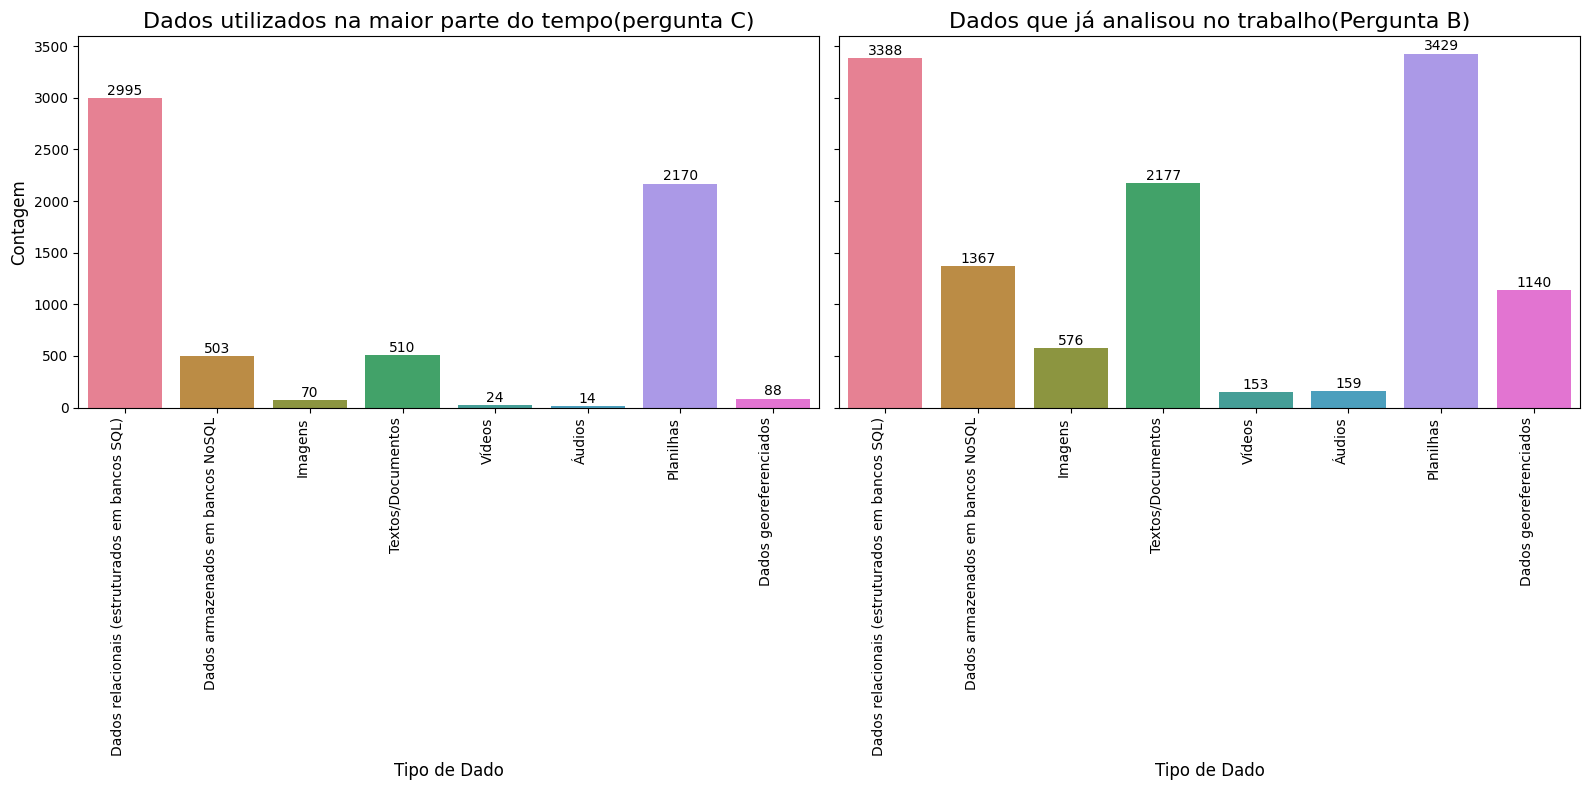

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista dos nomes completos das colunas para o primeiro conjunto de dados
columns_c = [
    ('P4_c_1', 'Dados relacionais (estruturados em bancos SQL)'),
    ('P4_c_2', 'Dados armazenados em bancos NoSQL'),
    ('P4_c_3', 'Imagens'),
    ('P4_c_4', 'Textos/Documentos'),
    ('P4_c_5', 'Vídeos'),
    ('P4_c_6', 'Áudios'),
    ('P4_c_7', 'Planilhas'),
    ('P4_c_8', 'Dados georeferenciados')
]

# Lista dos nomes completos das colunas para o segundo conjunto de dados
columns_b = [
    ('P4_b_1', 'Dados relacionais (estruturados em bancos SQL)'),
    ('P4_b_2', 'Dados armazenados em bancos NoSQL'),
    ('P4_b_3', 'Imagens'),
    ('P4_b_4', 'Textos/Documentos'),
    ('P4_b_5', 'Vídeos'),
    ('P4_b_6', 'Áudios'),
    ('P4_b_7', 'Planilhas'),
    ('P4_b_8', 'Dados georeferenciados')
]

# Função para contar valores iguais a 1.0
def count_values_equal_to_one(columns, df):
    count_one_values = []
    for col, col_title in columns:
        count_one = (df[col] == 1.0).sum()
        count_one_values.append((col_title, count_one))
    return count_one_values

# Contando os valores iguais a 1.0 para cada conjunto de colunas
count_one_values_c = count_values_equal_to_one(columns_c, df_p4)
count_one_values_b = count_values_equal_to_one(columns_b, df_p4)

# Criando DataFrames para os valores igual a 1.0
df_one_values_c = pd.DataFrame(count_one_values_c, columns=['Tipo de Dado', 'Contagem de Valores 1.0'])
df_one_values_b = pd.DataFrame(count_one_values_b, columns=['Tipo de Dado', 'Contagem de Valores 1.0'])

# Configuração da figura e subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plotando o gráfico de barras para o primeiro conjunto
sns.barplot(data=df_one_values_c, x='Tipo de Dado', y='Contagem de Valores 1.0', palette='husl', ax=axes[0])
axes[0].set_title('quais você utiliza na maior parte do tempo', fontsize=16)
axes[0].set_xlabel('Tipo de Dado', fontsize=12)
axes[0].set_ylabel('Contagem', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Exibindo o número de casos acima de cada barra para o primeiro gráfico
for i, value in enumerate(df_one_values_c['Contagem de Valores 1.0']):
    axes[0].text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Plotando o gráfico de barras para o segundo conjunto
sns.barplot(data=df_one_values_b, x='Tipo de Dado', y='Contagem de Valores 1.0', palette='husl', ax=axes[1])
axes[1].set_title('Quais você já analisou ou processou no trabalho?', fontsize=16)
axes[1].set_xlabel('Tipo de Dado', fontsize=12)
axes[1].set_ylabel('')  # Sem rótulo de y no segundo gráfico para evitar repetição
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='right')

# Exibindo o número de casos acima de cada barra para o segundo gráfico
for i, value in enumerate(df_one_values_b['Contagem de Valores 1.0']):
    axes[1].text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Ajustando layout
plt.tight_layout()
plt.show()


## 2.Qual a linguagem mais trabalhada?

* É possivel ver que a linguagem mais trabalha é SQL, isto faz muito sentindo pois o tipo de dado mais trabalhado são os dados relacionais(Estruturados em bancos SQL) por isso a liguagem mais utilizada é a liguagem SQL.   
Em seguida, é possivel ver a linguagem python como a segunda maior por ser uma linguagem altamente versatil e completa para cada situação.

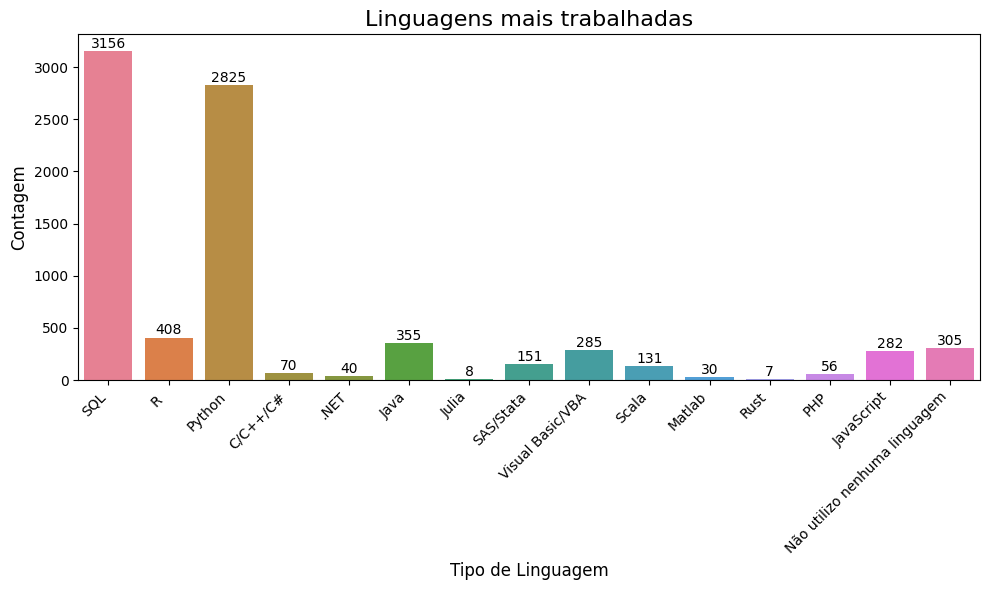

In [39]:

# Lista dos nomes completos das colunas
columns = [
('P4_d_1', 'SQL'),
('P4_d_2', 'R '),
('P4_d_3', 'Python'),
('P4_d_4', 'C/C++/C#'),
('P4_d_5', '.NET'),
('P4_d_6', 'Java'),
('P4_d_7', 'Julia'),
('P4_d_8', 'SAS/Stata'),
('P4_d_9', 'Visual Basic/VBA'),
('P4_d_10', 'Scala'),
('P4_d_11', 'Matlab'),
('P4_d_12', 'Rust'),
('P4_d_13', 'PHP'),
('P4_d_14', 'JavaScript'),
('P4_d_15', 'Não utilizo nenhuma linguagem')
]

# Lista para armazenar as contagens de valores iguais a 1.0
count_one_values = []

# Contando os valores iguais a 1.0 para cada coluna
for col, col_title in columns:
    count_one = (df_p4[col] == 1.0).sum()
    count_one_values.append((col_title, count_one))

# Criando um DataFrame para os valores igual a 1.0
df_one_values = pd.DataFrame(count_one_values, columns=['Tipo de Dado', 'Contagem de Valores 1.0'])

# Configuração da figura
plt.figure(figsize=(10, 6))

# Plotando o gráfico de barras
sns.barplot(data=df_one_values, x='Tipo de Dado', y='Contagem de Valores 1.0', palette='husl')

# Ajustando rótulos e título
plt.xticks(rotation=45, ha='right')
plt.title('Quais das linguagens listadas abaixo você utiliza no trabalho?', fontsize=16)
plt.xlabel('Tipo de Linguagem', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Exibindo o número de casos acima de cada barra
for i, value in enumerate(df_one_values['Contagem de Valores 1.0']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Ajustando layout
plt.tight_layout()
plt.show()

## 3. Quais ferramentas utilizadas no dia a dia?

### Uso de IA generativa

* Uma tecnologia que ganhou grande repercussão foi as de IA generativa no dia a dia do trabalho.   
Veremos a seguir como essa tecnologia é usada diariamente.

* Com a análise feita abaixo vemos que muitas empresas usam IA generativa, principalmente de forma gratuita.   
Ao contrário do que muitos pensam essas tecnologias não estão tomando os lugares dos trabalhadores, as IA´s gratuitas servem mais para consulta pois não possuem tanto poder quanto as IA´s pagas, e o número de pessoas que tem essas tecnologias pagas por empresas são bem poucas.

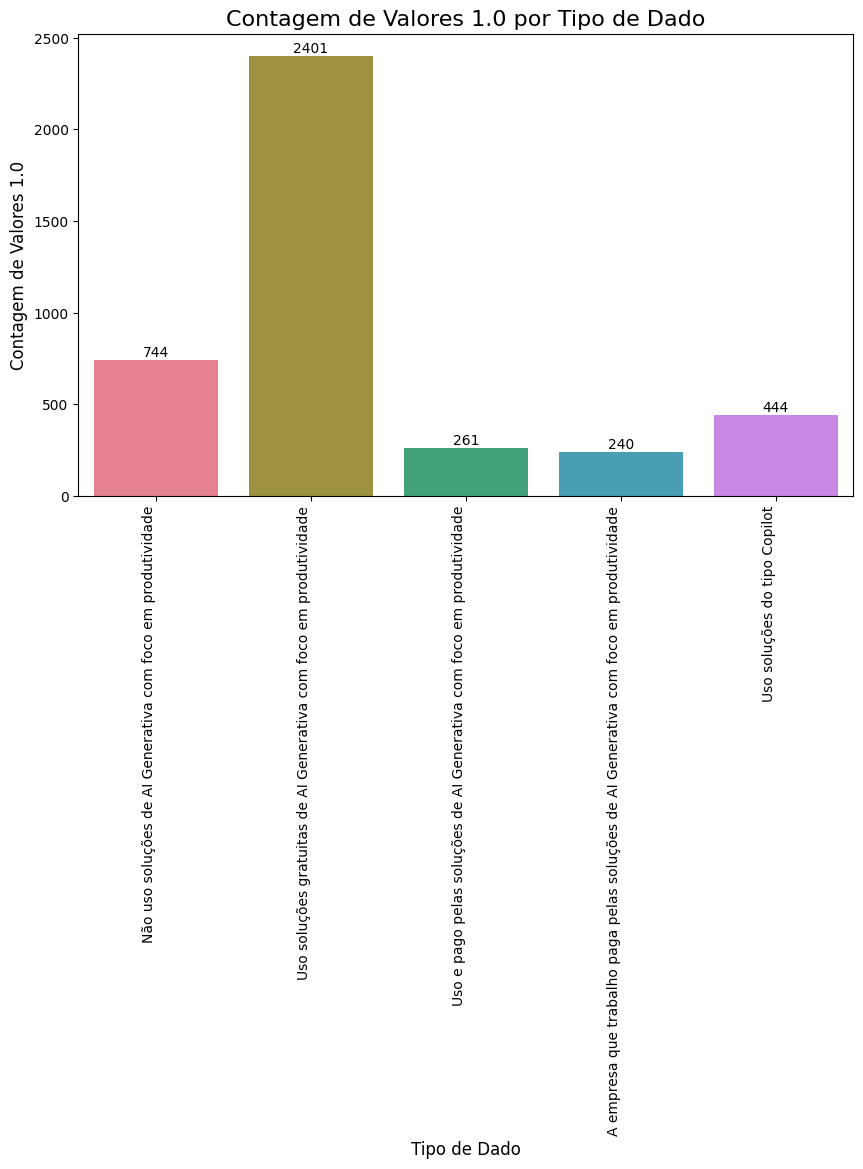

In [41]:

# Lista dos nomes completos das colunas
columns = [
('P4_m_1', 'Não uso soluções de AI Generativa com foco em produtividade'),
('P4_m_2', 'Uso soluções gratuitas de AI Generativa com foco em produtividade'),
('P4_m_3', 'Uso e pago pelas soluções de AI Generativa com foco em produtividade'),
('P4_m_4', 'A empresa que trabalho paga pelas soluções de AI Generativa com foco em produtividade'),
('P4_m_5', 'Uso soluções do tipo Copilot')
]

# Lista para armazenar as contagens de valores iguais a 1.0
count_one_values = []

# Contando os valores iguais a 1.0 para cada coluna
for col, col_title in columns:
    count_one = (df_p4[col] == 1.0).sum()
    count_one_values.append((col_title, count_one))

# Criando um DataFrame para os valores igual a 1.0
df_one_values = pd.DataFrame(count_one_values, columns=['Tipo de Dado', 'Contagem de Valores 1.0'])

# Configuração da figura
plt.figure(figsize=(10, 6))

# Plotando o gráfico de barras
sns.barplot(data=df_one_values, x='Tipo de Dado', y='Contagem de Valores 1.0', palette='husl')

# Ajustando rótulos e título
plt.xticks(rotation=45, ha='right')
plt.title('Utiliza ChatGPT ou LLMs no trabalho?', fontsize=16)
plt.xlabel('Respostas', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Exibindo o número de casos acima de cada barra
for i, value in enumerate(df_one_values['Contagem de Valores 1.0']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Ajustando layout
plt.tight_layout()
plt.show()